# World University Rankings 2023 #

## STAT 301 Group Project 

## By: Ayush Vora, Kaichi Nakajima, ZiXun Fang

## 1. Introduction

### Background Information

The World University Rankings Reports (WUR) are annual publications that rank global higher education institutions based on several performance indicators (teaching, research, knowledge transfer and international outlook) and are designed to help students and researchers identify well-performing institutions and make wise education decisions. Quacquarelli Symonds（QS), Times Higher Education (THE) and Shanghai Ranking Consultancy (the Academic Ranking of World Universities; ARWU) are the three longest and most influential global ranking institutions (Wiki, 2024). 

The 2023 World University Rankings dataset is the largest and most diverse ranking dataset. It contains data about 1,799 universities across 104 countries based on an analysis of over 121 million citations across over 15 million research publications and results from over 40,000 survey responses from global scholars.

The dataset includes 13 calibrated performance indicators:
1. University Rank
2. Name of University
3. Location
4. Number of Students
5. Number of Students per Staff
6. Percentage of International Students (%)
7. Female: Male Ratio (%)
8. Overall Score: Comprehensive response variable derived from various indicators
9. Teaching Score: the quality of teaching and campus environment
10. Researching Score: Academic and Employer Reputation
11. Citations Score: Number of times its publications are cited by others
12. Industry Income Score: Institution's ability to attract funds
13. International Outlook Score: Global engagement and diversity Outlook Score

### Research Question and Existing Literatures

The question that we plan to answer is, **Which metrics are most relavent for determining the overall score of a University**. Along with statistical methods to answer this, we will be looking at current research in this topic to see what others have to say on the matter. One paper that will be referred to is "A Critical Review on World University Ranking in Terms of Top Four Ranking Systems" by Anowar et al. This paper covers four of the most common ranking systems of universities around the world, and analyzes some of the most common metrics used by these ranking systems. The second paper is "University ranking using research, educational and environmental indicators" by Lukman et al. who try to find correlations between different ranking tables and their scores in other metrics.

## Methods and Results

### Exploratory Data Analysis (EDA)

To start off, we will be loading the appropriate libraries, and tidying the dataset. Not all of the variables above are important to us, including
- University Rank (Same metric as overall score; highest overall score = #1 ranking, second highest = #2, etc.)
- Name of University and Location (These are non-factor strings, so will not be important in statistical analysis)

In [1]:
library(tidyverse)
library(repr)
library(broom)
library(GGally)
library(car)
library(rsample)
library(glmnet)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    som

In [2]:
# Main Developer: ZiXun 
# Collaborator: Ayush (cleaned code)

#loading and fixing column names
university_data <- read_csv("uni_rankings_2023.csv")
colnames(university_data) <- c("university_rank", "name_of_university", "location", "no_of_student", "no_of_student_per_staff", 
                               "international_student", "female_male_ratio", "overall_score", "teaching_score", "research_score",
                               "citations_score","industry_income_score", "international_outlook_score")

# changing data from chr to dbl
university_data_cleaned <- university_data |>
    mutate(international_student = as.numeric(gsub("%", "", international_student)) / 100,
        female_male_ratio = as.numeric(sub(":.*", "", female_male_ratio))/as.numeric(sub(".*:", "", female_male_ratio)),
        overall_score = as.numeric(overall_score),
        teaching_score = as.numeric(teaching_score),
        research_score = as.numeric(research_score),
        citations_score = as.numeric(citations_score),
        industry_income_score = as.numeric(industry_income_score),
        international_outlook_score = as.numeric(international_outlook_score)) |>
    drop_na() |>
    select(- university_rank, - name_of_university, - location)

head(university_data_cleaned)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `overall_score = as.numeric(overall_score)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”


no_of_student,no_of_student_per_staff,international_student,female_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20965,10.6,0.42,0.9230769,96.4,92.3,99.7,99.0,74.9,96.2
21887,9.6,0.25,1.0000000,95.2,94.8,99.0,99.3,49.5,80.5
20185,11.3,0.39,0.8867925,94.8,90.9,99.5,97.0,54.2,95.8
16164,7.1,0.24,0.8518519,94.8,94.2,96.7,99.8,65.0,79.8
11415,8.2,0.33,0.6666667,94.2,90.7,93.6,99.8,90.9,89.3
2237,6.2,0.34,0.5873016,94.1,90.9,97.0,97.3,89.8,83.6


**Table 1:** A tidied dataset, with manipulatable data and unnecessary columns removed

We then naively fit a model using all of these variables to explore any interesting trends that emerge. Additionally, now is a good chance to check whether our model follows the correct model assumptions, including heteroscedasticity, normality of residuals, so on.

In [3]:
# Main Developer: ZiXun 
university_lm <- lm(overall_score ~ ., data = university_data_cleaned)

university_lm_results <- 
     tidy(university_lm, conf.int = TRUE) |>
     mutate_if(is.numeric, round, 2)

university_lm_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.02,0.03,0.54,0.59,-0.05,0.09
no_of_student,0.00,0.00,-0.38,0.70,0.00,0.00
no_of_student_per_staff,0.00,0.00,-1.17,0.24,0.00,0.00
international_student,0.00,0.04,0.03,0.97,-0.07,0.07
female_male_ratio,-0.02,0.01,-1.82,0.07,-0.04,0.00
teaching_score,0.30,0.00,563.92,0.00,0.30,0.30
research_score,0.30,0.00,650.03,0.00,0.30,0.30
citations_score,0.30,0.00,935.24,0.00,0.30,0.30
industry_income_score,0.02,0.00,135.82,0.00,0.02,0.03


**Table 2:** The results of a linear model using all variables

#### Checking Heteroscedasticity

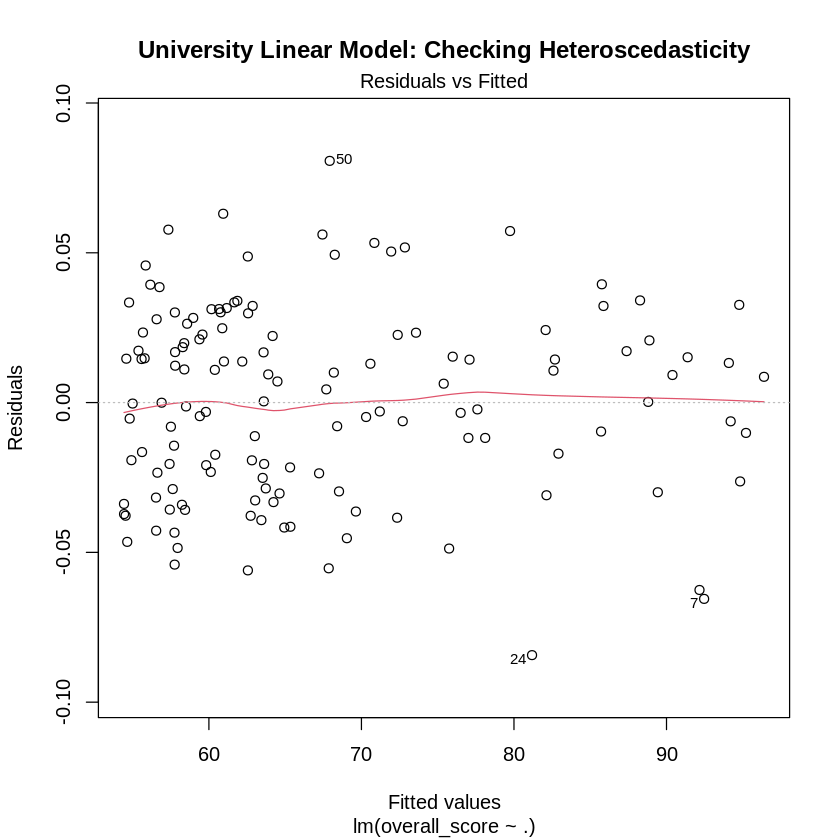

In [4]:
# Main Developer: ZiXun
plot(university_lm, 1, main = "University Linear Model: Checking Heteroscedasticity")

**Figure 1:** A residual plot of the full linear model

Based on this graph, it seems that the residuals are quite random and centered around 0, indicating that the heteroscedasticity assumption is met

#### Normality of Residuals

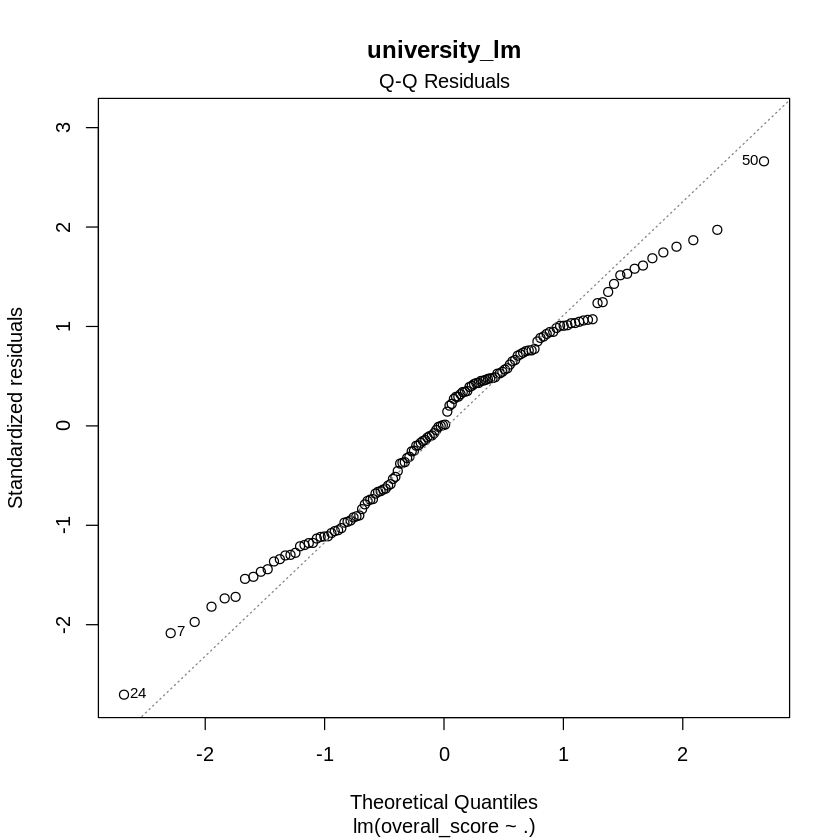

In [5]:
# Main Developer: ZiXun
plot(university_lm, 2, main = "university_lm")

**Figure 2:** A Q-Q Plot of the full linear model

Based on this graph, it seems that the residuals are not normally distributed, but instead have lighter tails. However, because our sample size is quite large, we can rely on the Central Limit Theorem instead, satisfying our assumption. Either way, it is always good to check.

#### Residuals Histogram

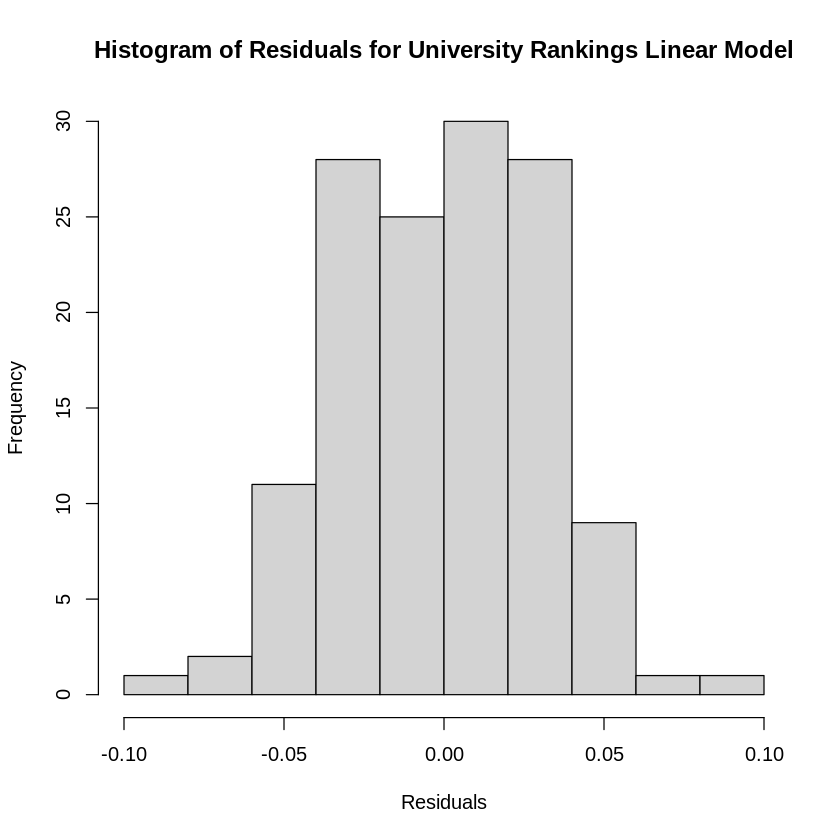

In [6]:
# Main Developer: ZiXun
hist(residuals(object = university_lm),
  breaks = 10,
  main = "Histogram of Residuals for University Rankings Linear Model",
  xlab = "Residuals")

**Figure 3:** A histogram of the residuals of the full model

#### Correlation Between Each Variable

Below we plot each of the variables against each other in a pairs plot. Here, we can see the correlation between each of the variables. It seems that the variables most associated with the overall score is the number of students per staff, the international student rate, the teaching score, the research score, the citations score, and the international outlook score. It is important to note that just because there is a correlation with them does not imply that the will necessarily be used in our final model. It is possible that there may be a high correlation between the above values, so only some of them are needed for a successful model. This will be explored further below. Additionally, there is a heatmap indicating similar information below.

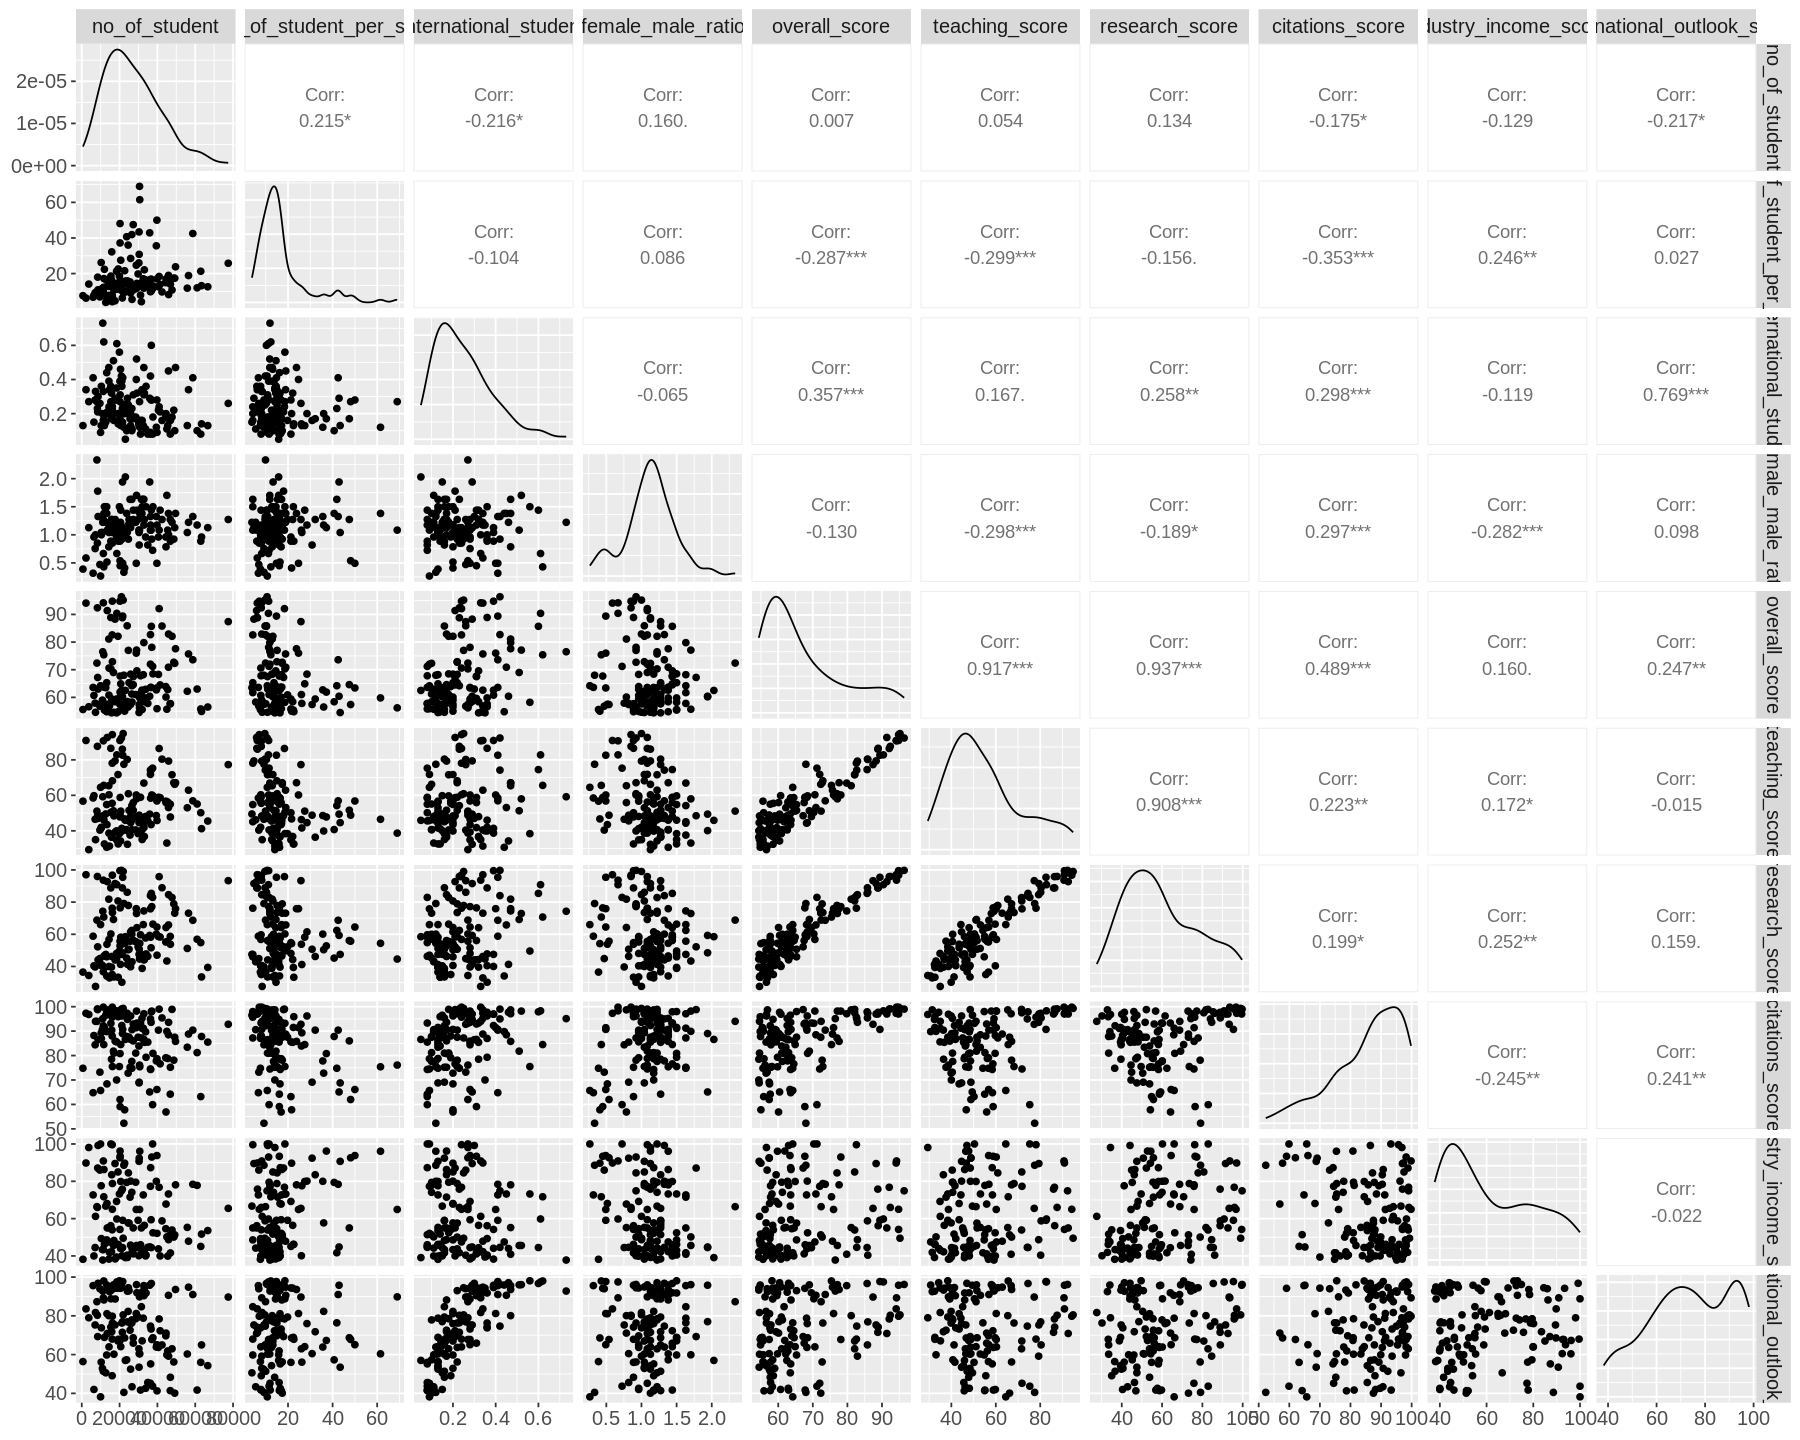

In [7]:
# Main Developer: ZiXun
# Collaborator: Ayush (cleaned)
options(repr.plot.width = 15, repr.plot.height = 12) 

university_data_pair_plot <- university_data_cleaned |>
    ggpairs(progress = FALSE) +
    theme(text = element_text(size = 15))

university_data_pair_plot

**Figure 3:** A pairwise scatterplot of each of the variables in the full linear model.

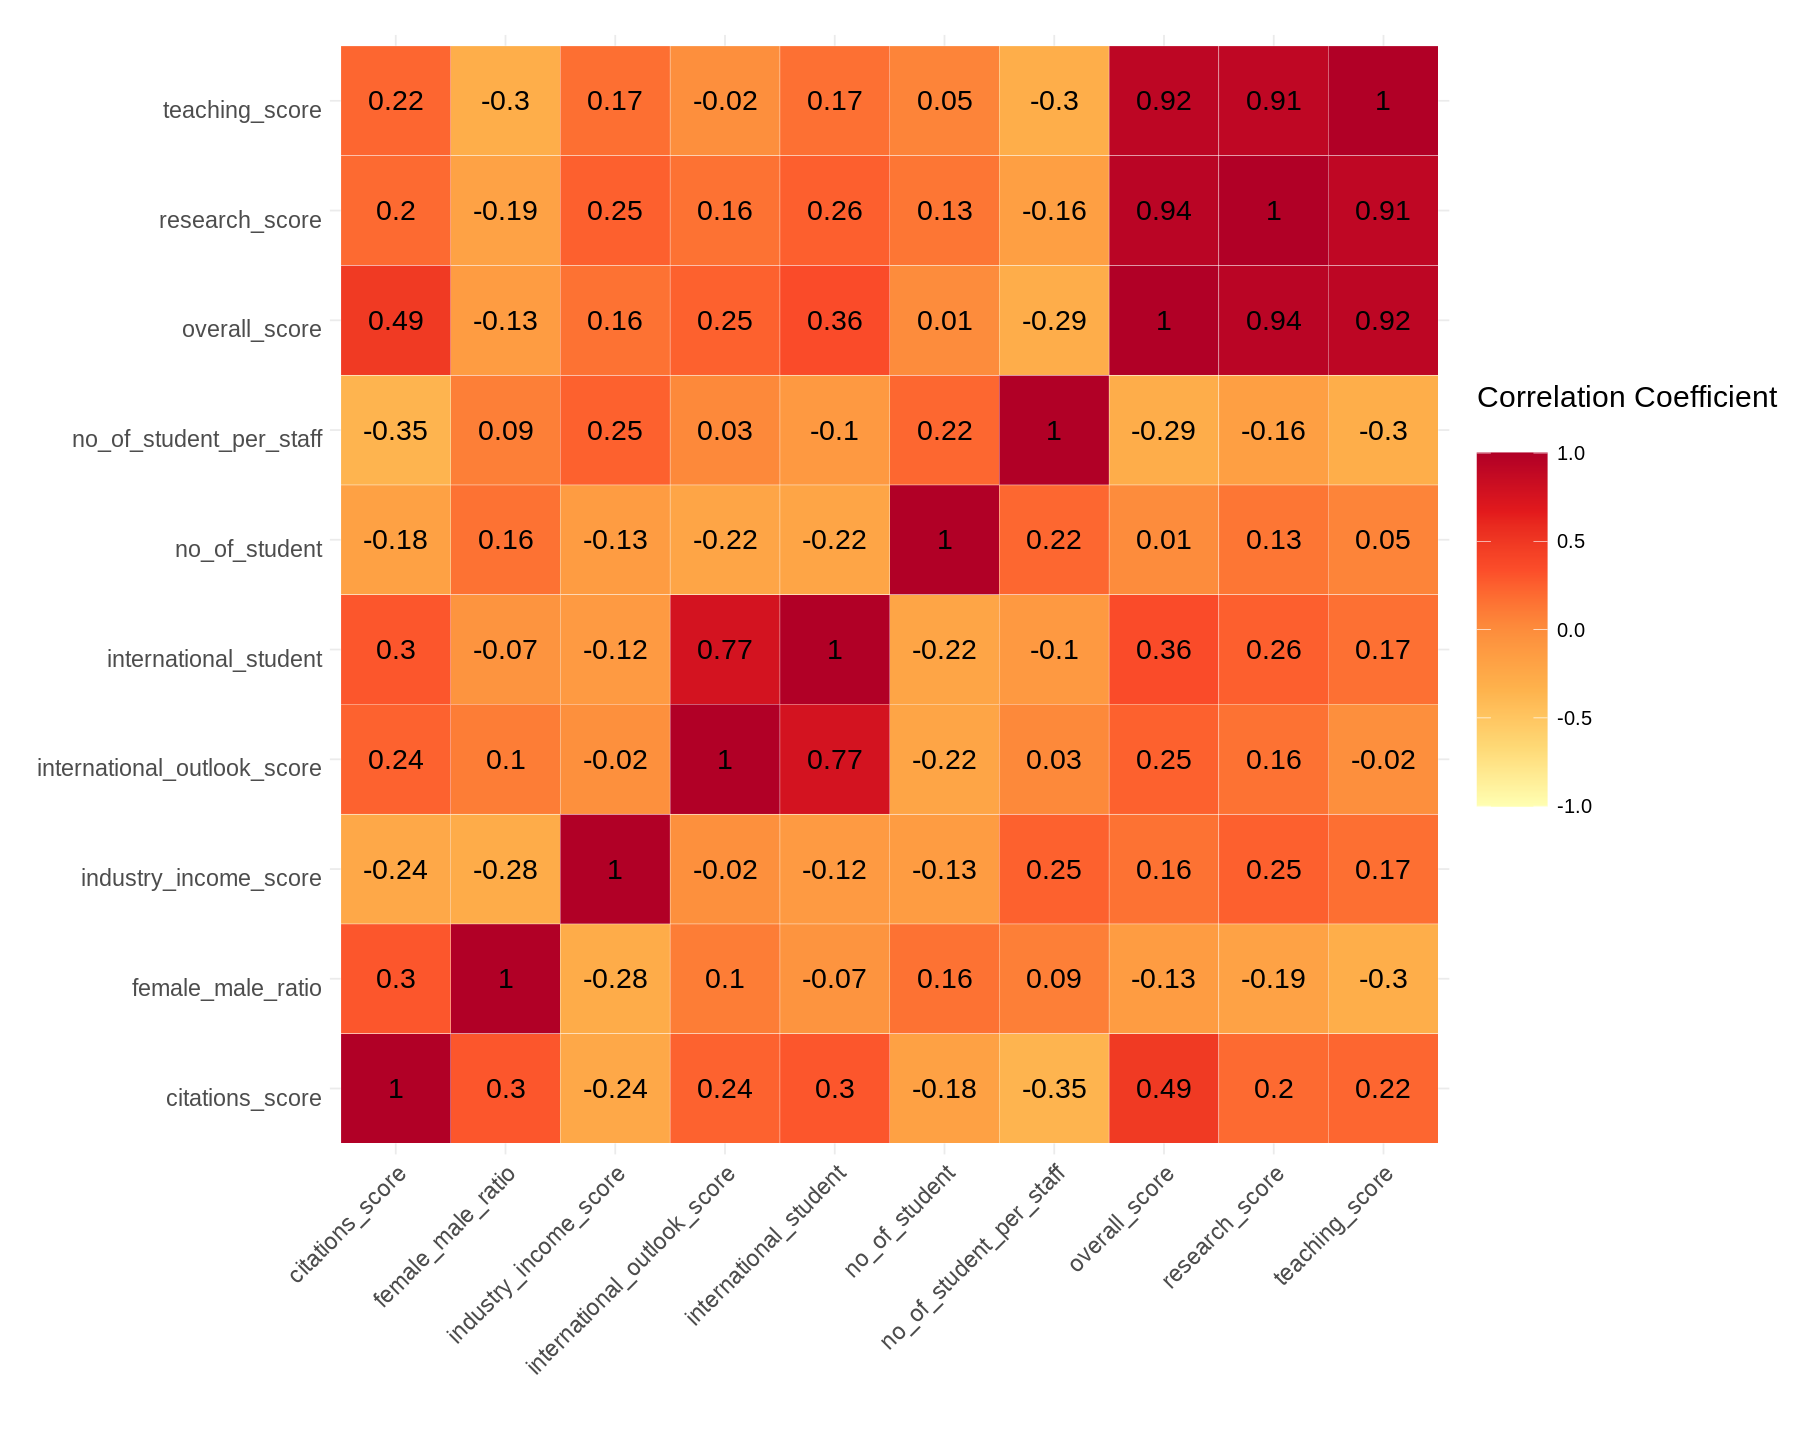

In [8]:
# Main Developer: ZiXun
# Collaborator: Ayush (cleaned)

plot_corr_matrix_university <- 
    university_data_cleaned |>
    cor() |>
    as_tibble(rownames = 'var1') |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr") |>
    ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n", palette =  "YlOrRd", direction = 1, limits = c(-1,1)) +
     labs(x = "", y = "") +
     theme_minimal() +
     theme(
         axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
         axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
         legend.title = element_text(size = 18),
         legend.text = element_text(size = 12),
         legend.key.size = unit(1.5, "cm")) +
     coord_fixed() +
     geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)

plot_corr_matrix_university

**Figure 4:** A correlation heatmap of each of the variables in the full model

### 2. Methods: Plan

To start off, we will verify the VIFs of the full model to identify if multicollinearity exists.

In [9]:
# Main Developer: Kaichi
vif(university_lm)

no_of_student     no_of_student_per_staff 
                   1.421581                    1.459595 
      international_student           female_male_ratio 
                   3.005962                    1.594561 
             teaching_score              research_score 
                   9.428611                    9.267245 
            citations_score       industry_income_score 
                   1.616941                    1.537604 
international_outlook_score 
                   3.125979

Research score and teaching score have concerningly high variance inflation factors, indicating we should remove these variables from the model. However, upon closer inspection, the two variables are highly correlated to each other. Thus, removing the variable with the highest vif should suffice.

In [10]:
# Main Developer: Kaichi

teaching_removed_lm <- lm(overall_score ~ . - teaching_score, data = university_data_cleaned)
vif(teaching_removed_lm)

no_of_student     no_of_student_per_staff 
                   1.383967                    1.388949 
      international_student           female_male_ratio 
                   2.999455                    1.446593 
             research_score             citations_score 
                   1.500528                    1.580512 
      industry_income_score international_outlook_score 
                   1.498008                    2.765207

However, using only the VIF may not result in the best fitted model; thus, we will use regularization techniques to select the best variables to include in our final model. Since this data has a large number of covariates where multicollinearity could potentially be an issue and we want to find the relevant variables with the highest association with `overall_score`, we will run Lasso regularization to select our varaiables for the final model. 

First we will standardize the training set so that an equal penalty is applied to all variables when running lasso.

In [11]:
# Main Developer: Kaichi
# Collaborator: Ayush (simplified)

uni_standardized <- university_data_cleaned |>
mutate(no_of_student = (no_of_student - mean(no_of_student)) / sd(no_of_student),
       no_of_student_per_staff = (no_of_student_per_staff - mean(no_of_student_per_staff)) / sd(no_of_student_per_staff),
       international_student = (international_student - mean(international_student)) / sd(international_student),
       female_male_ratio = (female_male_ratio - mean(female_male_ratio)) / sd(female_male_ratio),
       teaching_score = (teaching_score - mean(teaching_score)) / sd(teaching_score),
       research_score = (research_score - mean(research_score)) / sd(research_score),
       citations_score = (citations_score - mean(citations_score)) / sd(citations_score),
       industry_income_score = (industry_income_score - mean(industry_income_score)) / sd(industry_income_score),
       international_outlook_score = (international_outlook_score - mean(international_outlook_score)) / sd(international_outlook_score)
       )
head(uni_standardized)

no_of_student,no_of_student_per_staff,international_student,female_male_ratio,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.3983546,-0.5576823,1.30517312,-0.5662087,96.4,2.285459,2.138132,1.1657643,0.6875956,1.3080749
-0.3360481,-0.6462550,0.01285609,-0.3501393,95.2,2.438543,2.100368,1.1926635,-0.6435130,0.3976797
-0.4510651,-0.4956814,1.07711717,-0.6681283,94.8,2.199731,2.127342,0.9864362,-0.3972055,1.2848801
-0.7227943,-0.8676867,-0.06316255,-0.7662730,94.8,2.401803,1.976287,1.2374955,0.1687777,0.3570888
-1.0437199,-0.7702567,0.62100528,-1.2864402,94.2,2.187485,1.809048,1.2374955,1.5260891,0.9079649
-1.6639464,-0.9474021,0.69702393,-1.5093690,94.1,2.199731,1.992472,1.0133354,1.4684427,0.5774392


**Table 3:** The standardized dataset

Next we will split our data into training (70%) and testing (30%) data.

In [12]:
# Main Developer: Kaichi
# Collaborator: Ayush (Added seed)

set.seed(1)
data_split <- initial_split(uni_standardized, prop = 0.7) #splits the dataset into a 7:3 ratio
uni_training <- training(data_split) #creates training data which includes 70% of original data
uni_testing <- testing(data_split) #creates testing data which includes 30% of original data

Now we will run Lasso regularization on `uni_training` since the training data is used to train the model to fit the data and penalize large coefficients. By running lasso on the training data we will be able to find the value of the L1 penalty term ($\lambda$) that provides the lowest cross-validation MSE.

In [13]:
# Main Developer: Kaichi
# Collaborator: Ayush (Debugged)

#run the lasso regression on the training set
uni_lasso <- cv.glmnet(uni_training |> select(-overall_score) |> as.matrix(), uni_training$overall_score, alpha=1)
uni_lasso


Call:  cv.glmnet(x = as.matrix(select(uni_training, -overall_score)),      y = uni_training$overall_score, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.1649    46  0.1406 0.02488       5
1se 0.1810    45  0.1625 0.02995       5

**Table 4:** The results of the lasso regression

Now that we ran the model, we will extract the coefficients of the model with the lowest cross-validation MSE and the names of the covariates.

In [14]:
# Main Developer: Kaichi
lasso_coef <- coef(uni_lasso, s = uni_lasso$lambda.min)
lasso_coef

10 x 1 sparse Matrix of class "dgCMatrix"
                                    s1
(Intercept)                 67.3872908
no_of_student                .        
no_of_student_per_staff      .        
international_student        .        
female_male_ratio            .        
teaching_score               4.5351661
research_score               5.8463406
citations_score              3.2012634
industry_income_score        0.2329708
international_outlook_score  1.0858038

**Table 5**: Coefficients of Model with Lowest MSE

In [15]:
# Main Developer: Kaichi

#obtain the selected covariates
lasso_selected_covariates <-
    as_tibble(
        as.matrix(lasso_coef),
        rownames='covariate') |>
        filter(covariate != '(Intercept)' & abs(s1) !=0) |>
        pull(covariate)
lasso_selected_covariates

[1] "teaching_score"              "research_score"             
[3] "citations_score"             "industry_income_score"      
[5] "international_outlook_score"

Lasso regression should remove variables with high multicollinearity and is able to fit models on datasets with high multicollinearity. To verify this, we will check the variance inflation factor (VIF) of the lasso model

In [16]:
# Main Developer: Kaichi

lasso_vif <- vif(lm(overall_score ~ . , data = uni_training |>
        select(contains(lasso_selected_covariates), overall_score)))
lasso_vif

teaching_score              research_score 
                   6.942467                    7.234874 
            citations_score       industry_income_score 
                   1.310546                    1.322466 
international_outlook_score 
                   1.403338

Most of the variables selected in this model have low vif values indicating there is no issue of multicollinearity. However, `teaching_score` and `reasearch_score` both have high vif values which point to multicollinearity. Despite the high multicollinearity, the model could still be effective since lasso regression includeds variables that have high multicollinearity if they contribute significantly to the model. To verify the effectiveness of the model, we will fit an oridinary least squares model with the lasso selected variables and evaluate the $R^2$ value to determine the models effectiveness. To fit the OLS we will use the testing data which was kept separate from the training process as it provides an unbiased evaluation when comparing different models and a measure of how well the model does on unseen data. 

In [17]:
# Main Developer: Kaichi

#fit OLS model using lasso selected covariates
lasso_cov_model <- lm(overall_score ~ ., data = uni_testing |> select(contains(lasso_selected_covariates), overall_score))
summary(lasso_cov_model)


Call:
lm(formula = overall_score ~ ., data = select(uni_testing, contains(lasso_selected_covariates), 
    overall_score))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.063792 -0.022312 -0.000363  0.027356  0.062368 

Coefficients:
                             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                 67.384581   0.005415 12444.53   <2e-16 ***
teaching_score               4.888486   0.015168   322.28   <2e-16 ***
research_score               5.567482   0.015678   355.11   <2e-16 ***
citations_score              3.349393   0.006508   514.65   <2e-16 ***
industry_income_score        0.471453   0.005528    85.29   <2e-16 ***
international_outlook_score  1.298947   0.006789   191.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03433 on 35 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 9.825e+05 on 5 and 35 DF,  p-value: < 2.2e-16


**Table 6**: Summary of OLS Model Using Lasso Selected Variables

We will now compare it to the full OLS model.

In [18]:
summary(lm(overall_score ~., data = uni_testing))


Call:
lm(formula = overall_score ~ ., data = uni_testing)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.048367 -0.015832 -0.001447  0.016559  0.058282 

Coefficients:
                             Estimate Std. Error   t value Pr(>|t|)    
(Intercept)                 67.386159   0.004917 13704.502   <2e-16 ***
no_of_student               -0.001181   0.007688    -0.154   0.8789    
no_of_student_per_staff      0.003751   0.006970     0.538   0.5943    
international_student        0.023697   0.011845     2.000   0.0543 .  
female_male_ratio           -0.016696   0.007190    -2.322   0.0270 *  
teaching_score               4.879402   0.015420   316.439   <2e-16 ***
research_score               5.569986   0.016572   336.101   <2e-16 ***
citations_score              3.351905   0.007552   443.841   <2e-16 ***
industry_income_score        0.469835   0.005861    80.161   <2e-16 ***
international_outlook_score  1.279536   0.010745   119.086   <2e-16 ***
---
Signif. codes:  

**Table 7**: Summary of Full OLS Model

The adjusted $R^2$ in the full model is the same as the model with the lasso selected variables which implies that both the full model and model with lasso selected variables explain the variance `overall_score` equally than the model with both of the $R^2$ being 1. The $R^2$ being 1 implies that both models perfectly explain the variance of `overall_score`. Since the $R^2$ between the full model and lasso model was relatively the same, it justifies the variables selected with the lasso model since it implies that the variables removed did not make a significant impact to the models ability to explain the variance in `overall_score`. This result is also consistent with the result of the $p$-values in the full model as the variables that were removed in the lasso regression are also shown as insignificant in the full model.

Approximating that $1.849\times 10^{-6} \approx 0$, if we were to write this model as a formula, it would be
$$Y = 67.3846 + 4.8885x_t + 5.5675x_r + 3.3494x_c + 0.4715x_i + 1.2989x_o + \epsilon$$
where $Y$ is the overall score of a university, $x_t$ is the teaching score, $x_r$ is the research score, $x_c$ is the citations score, $x_i$ is the industry income score, and $x_o$ is the international outlook score, and $\epsilon$ is the error term representing the uncertainty of the random variable.

The formula implies that for an increase of 1 in the teaching score, the expected increase in overall score is 4.8885 holding on other variables constant. Similaraly, for an increase in research score by 1, the expected increase in overall score is 5.5675. This will be the same for the rest of the covariates. Since the values of the covariates are centered in this case, the intercept value 67.3846 is the expected value of the overall score when all covariates are at their mean values.

## 3. Discussion

Looking at the model above, it appears that the most important metrics for determining a university's overall score is their specific scores in other metrics, including teaching, research, citations, industry income, and international outlook. Other metrics such as the number of students per staff, male to female ratio, and international student rate are less important here. Using the model formula above, we can also determine which of the scores are most important for determining a university's overall score. Research score seems to be the most important, followed by teaching score, citation score, international outlook score, and finally industry income score.

The information collected here aligns with current research on the topic as well. When looking at the paper by Lukman et al. mentioned above, they conclude that three of the primary indicators of university rankings include, in order of priority, research performance, educational performance, and environmental performance. Although we do not have an environmental score in our model, we can see that they also see that a stronger prowess in research is correlated to a higher overall ranking, compared to a stronger teaching score.

The paper by Anowar et al. mentioned above describe many metrics that can help determine a university's ranking, such as peer opinion, international score, citations, employer reputation, and visibility. However, they group these topics into one of two categories: research and education. Anowar et al. show that the three other scores we have (citation, international outlook, and industry outcome) can be grouped in with the other two scores. Citation and industry outcome can be added to the research score with high weightage, while the international outlook can be added to the research score with a smaller weightage.

Based on that paper, we can start looking at other possible questions to answer. Firstly, how can we incorporate some of our metrics, such as citation score and industry outcome score, into current variables, such as research score? This can possibly be done using a weighted average, but we would need to explore how to weigh it fairly. If we are able to do so, we can simplify our model further, as there would be less parameters. Another question is, if we were to use some of the ommited metrics, such as location, could we create a new, more accurate model? We could possibly group each country in the `location` column by continent, and possibly explore trends (are North America schools higher rated than Africa schools, for example).

One way that our model could potentially be improved is exploring interaction terms. Although it would not make much sense in the context, we can explore how different interaction terms between variables would fit into our model. If there is a benefit to adding them, we would have a more accurate model. Looking at figure 3, the pairwise plot, we can see that some of the variables, such as the citations score, have a non-linear relationship with overall score. It would be beneficial to account for this by applying a transformation in the variable. Doing so would increase the linearity in the model. We would have to experiment to see what transformation would be the best for the model.

## 4. References


Anowar, F., Helal, M. A., Afroj, S., Sultana, S., Sarker, F., & Mamun, K. A. (2014). A Critical Review on World University Ranking in Terms of Top Four Ranking Systems. *Lecture Notes in Electrical Engineering*, 559–566. https://doi.org/10.1007/978-3-319-06764-3_72 

Lukman, R., Krajnc, D., & Glavič, P. (2010). University ranking using research, educational and environmental indicators. *Journal of Cleaner Production*, 18(7), 619–628. https://doi.org/10.1016/j.jclepro.2009.09.015 

*World University Rankings 2023*. (2023, August 31). Kaggle. https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023